In [16]:
from google.colab import files
upload = files.upload()
!mkdir ~/.kaggle

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!mv ./kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download -d johnolafenwa/us-census-data

us-census-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!ls

adult-test.csv	adult-training.csv  sample_data  us-census-data.zip


In [20]:
!unzip us-census-data.zip

Archive:  us-census-data.zip
replace adult-test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace adult-training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

train_df = pd.read_csv('adult-training.csv', names=columns)
test_df = pd.read_csv('adult-test.csv', names=columns)
train_df.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [272]:
train_df.Income

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
5         <=50K
6         <=50K
7          >50K
8          >50K
9          >50K
10         >50K
11         >50K
12        <=50K
13        <=50K
14         >50K
15        <=50K
16        <=50K
17        <=50K
18        <=50K
19         >50K
20         >50K
21        <=50K
22        <=50K
23        <=50K
24        <=50K
25         >50K
26        <=50K
27         >50K
28        <=50K
29        <=50K
          ...  
32531     <=50K
32532      >50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
32537     <=50K
32538      >50K
32539      >50K
32540     <=50K
32541     <=50K
32542     <=50K
32543     <=50K
32544     <=50K
32545      >50K
32546     <=50K
32547     <=50K
32548     <=50K
32549     <=50K
32550     <=50K
32551     <=50K
32552     <=50K
32553     <=50K
32554      >50K
32555     <=50K
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32

In [273]:
print(train_df.Income.dtype)
train_df.describe()

object


,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [274]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
def preprocess(df):
  df.replace(' ?', np.nan, inplace=True)
  print("Replaced ? with NAN values .")
  print("-----------------------------")
  print("There are {} numerical and {} categorical columns.".format(df.select_dtypes(include=[np.number]).shape[1], df.select_dtypes(include=['object']).shape[1]))
  print("------------------------------")
  print("Handling missing values")
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (( df.isnull().sum() / df.isnull().count() ) * 100).sort_values(ascending=False)
  missing_data = pd.DataFrame({
      'total': total,
      'percent': percent
  })
  print(missing_data.head(20))
  cols_to_be_dropped = []
  for percent in missing_data.percent:
    if percent > 15.0:
      cols_to_be_dropped.append(missing_data.index[missing_data.percent == percent][0])
  
  print("There were {} cols with a lot of information missing . So they are being removed".format(len(cols_to_be_dropped)))
  df.drop(cols_to_be_dropped, axis=1, inplace=True)
  print('{} cols were deleted from the dataset'.format(cols_to_be_dropped))
  
  print("-------------------------------")
  
  for total in missing_data['total']:
    if total > 0:
      print("{} feature has {} number of missing values".format(missing_data.index[missing_data.total == total][0], total))
      df[missing_data.index[missing_data.total == total][0]].fillna('0', inplace=True)
      print("Replaced {} values with 0".format(total))
  
  return df
        
        

In [276]:
train_df = preprocess(train_df)

Replaced ? with NAN values .
-----------------------------
There are 6 numerical and 9 categorical columns.
------------------------------
Handling missing values
                total   percent
Occupation       1843  5.660146
Workclass        1836  5.638647
Native country    583  1.790486
Income              0  0.000000
Hours/Week          0  0.000000
Capital Loss        0  0.000000
Capital Gain        0  0.000000
Sex                 0  0.000000
Race                0  0.000000
Relationship        0  0.000000
Marital Status      0  0.000000
Education num       0  0.000000
Education           0  0.000000
fnlgwt              0  0.000000
Age                 0  0.000000
There were 0 cols with a lot of information missing . So they are being removed
[] cols were deleted from the dataset
-------------------------------
Occupation feature has 1843 number of missing values
Replaced 1843 values with 0
Workclass feature has 1836 number of missing values
Replaced 1836 values with 0
Native country

In [277]:
test_df = preprocess(test_df)

Replaced ? with NAN values .
-----------------------------
There are 5 numerical and 10 categorical columns.
------------------------------
Handling missing values
                total   percent
Occupation        967  5.939074
Workclass         964  5.920649
Native country    275  1.688982
Income              1  0.006142
Hours/Week          1  0.006142
Capital Loss        1  0.006142
Capital Gain        1  0.006142
Sex                 1  0.006142
Race                1  0.006142
Relationship        1  0.006142
Marital Status      1  0.006142
Education num       1  0.006142
Education           1  0.006142
fnlgwt              1  0.006142
Age                 0  0.000000
There were 0 cols with a lot of information missing . So they are being removed
[] cols were deleted from the dataset
-------------------------------
Occupation feature has 967 number of missing values
Replaced 967 values with 0
Workclass feature has 964 number of missing values
Replaced 964 values with 0
Native country fe

In [278]:
train_df['Workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
5                  Private
6                  Private
7         Self-emp-not-inc
8                  Private
9                  Private
10                 Private
11               State-gov
12                 Private
13                 Private
14                 Private
15                 Private
16        Self-emp-not-inc
17                 Private
18                 Private
19        Self-emp-not-inc
20                 Private
21                 Private
22             Federal-gov
23                 Private
24                 Private
25               Local-gov
26                 Private
27                       0
28                 Private
29                 Private
               ...        
32531                    0
32532              Private
32533              Private
32534              Private
32535              Private
32536              Private
3

In [279]:
test_df.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income'],
      dtype='object')

In [280]:
train_df.Income

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
5         <=50K
6         <=50K
7          >50K
8          >50K
9          >50K
10         >50K
11         >50K
12        <=50K
13        <=50K
14         >50K
15        <=50K
16        <=50K
17        <=50K
18        <=50K
19         >50K
20         >50K
21        <=50K
22        <=50K
23        <=50K
24        <=50K
25         >50K
26        <=50K
27         >50K
28        <=50K
29        <=50K
          ...  
32531     <=50K
32532      >50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
32537     <=50K
32538      >50K
32539      >50K
32540     <=50K
32541     <=50K
32542     <=50K
32543     <=50K
32544     <=50K
32545      >50K
32546     <=50K
32547     <=50K
32548     <=50K
32549     <=50K
32550     <=50K
32551     <=50K
32552     <=50K
32553     <=50K
32554      >50K
32555     <=50K
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32

In [281]:
test_df.Income

0              0
1         <=50K.
2         <=50K.
3          >50K.
4          >50K.
5         <=50K.
6         <=50K.
7         <=50K.
8          >50K.
9         <=50K.
10        <=50K.
11         >50K.
12        <=50K.
13        <=50K.
14        <=50K.
15         >50K.
16         >50K.
17        <=50K.
18        <=50K.
19        <=50K.
20         >50K.
21         >50K.
22        <=50K.
23        <=50K.
24        <=50K.
25        <=50K.
26         >50K.
27        <=50K.
28        <=50K.
29        <=50K.
          ...   
16252     <=50K.
16253      >50K.
16254     <=50K.
16255      >50K.
16256      >50K.
16257     <=50K.
16258     <=50K.
16259     <=50K.
16260     <=50K.
16261     <=50K.
16262      >50K.
16263     <=50K.
16264     <=50K.
16265     <=50K.
16266      >50K.
16267     <=50K.
16268     <=50K.
16269     <=50K.
16270     <=50K.
16271     <=50K.
16272     <=50K.
16273     <=50K.
16274     <=50K.
16275     <=50K.
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50

In [0]:
train_df['Income'] = train_df['Income'].apply(lambda x: 0 if x==' <=50K' else 1)
test_df['Income'] = test_df['Income'].apply(lambda x: 0 if x==' <=50K.' else 1)

In [283]:
train_df.Income

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

In [284]:
test_df.Income

0        1
1        0
2        0
3        1
4        1
5        0
6        0
7        0
8        1
9        0
10       0
11       1
12       0
13       0
14       0
15       1
16       1
17       0
18       0
19       0
20       1
21       1
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
16252    0
16253    1
16254    0
16255    1
16256    1
16257    0
16258    0
16259    0
16260    0
16261    0
16262    1
16263    0
16264    0
16265    0
16266    1
16267    0
16268    0
16269    0
16270    0
16271    0
16272    0
16273    0
16274    0
16275    0
16276    0
16277    0
16278    0
16279    0
16280    0
16281    1
Name: Income, Length: 16282, dtype: int64

In [0]:
def make_plots(df):
  numerical_features = list(df.select_dtypes(include=[np.number]).columns)
  for feats in numerical_features:
    plt.subplots(figsize=(12,9))
    sns.distplot(df[feats])
    plt.show()
    print(df[feats].describe())
    
  return df, numerical_features    

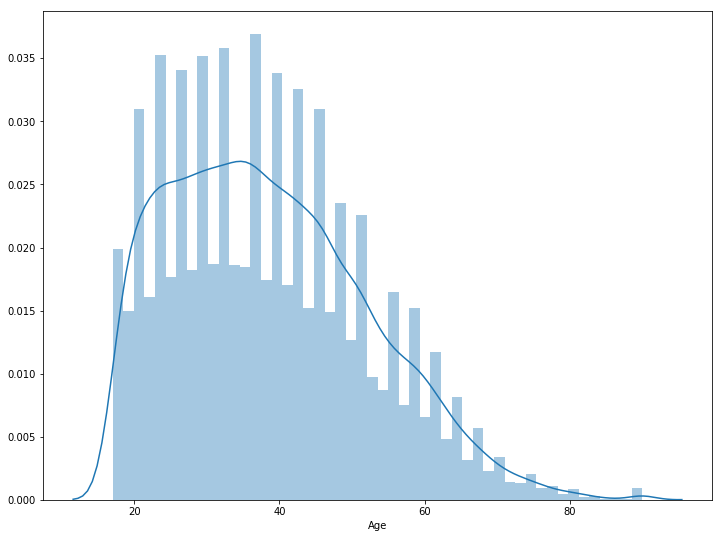

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64


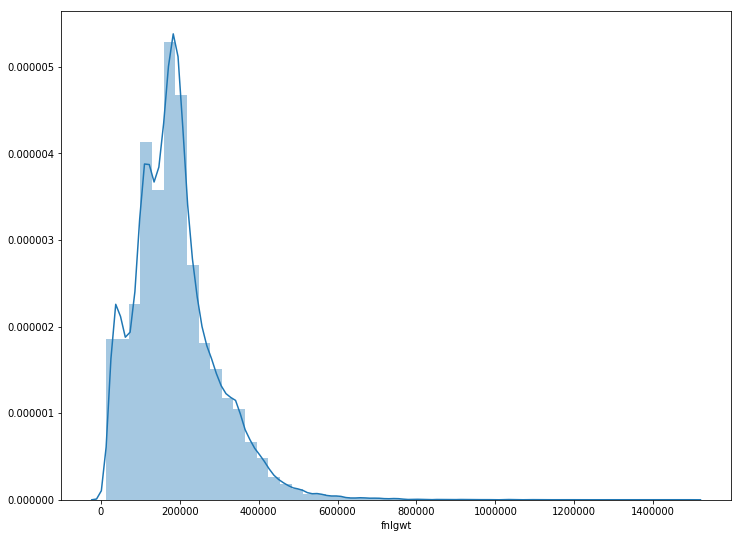

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64


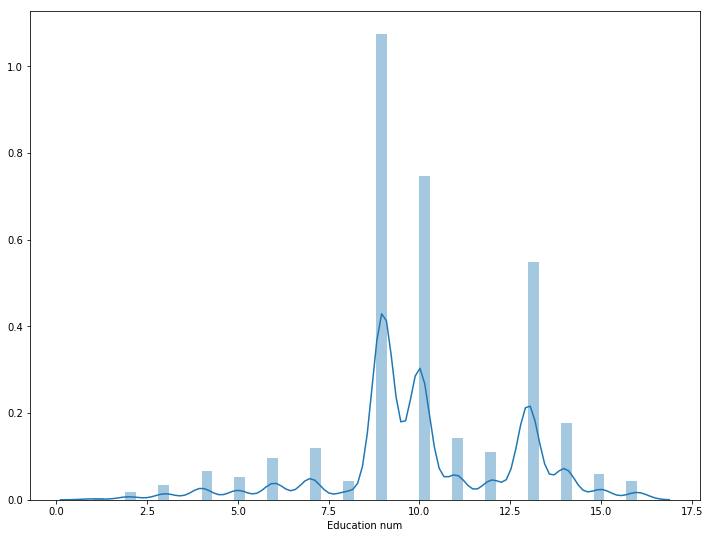

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education num, dtype: float64


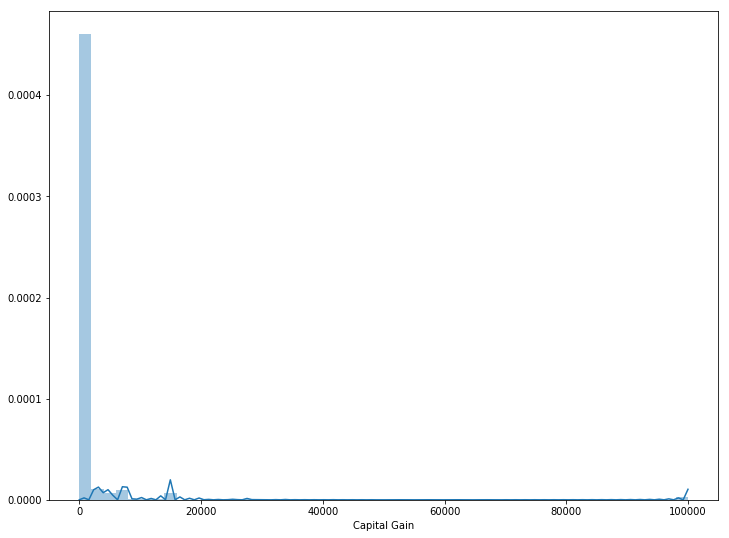

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64


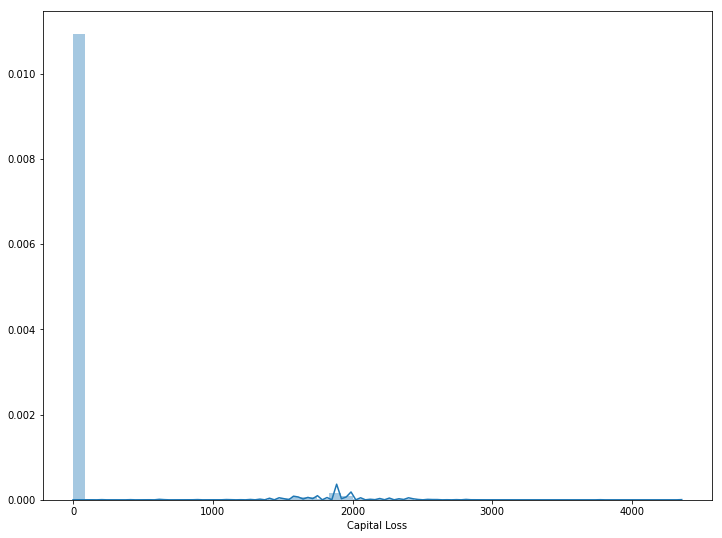

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64


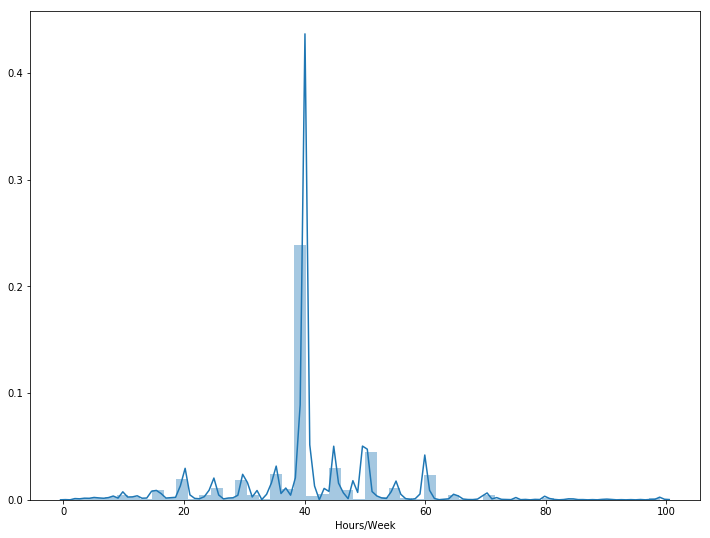

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours/Week, dtype: float64


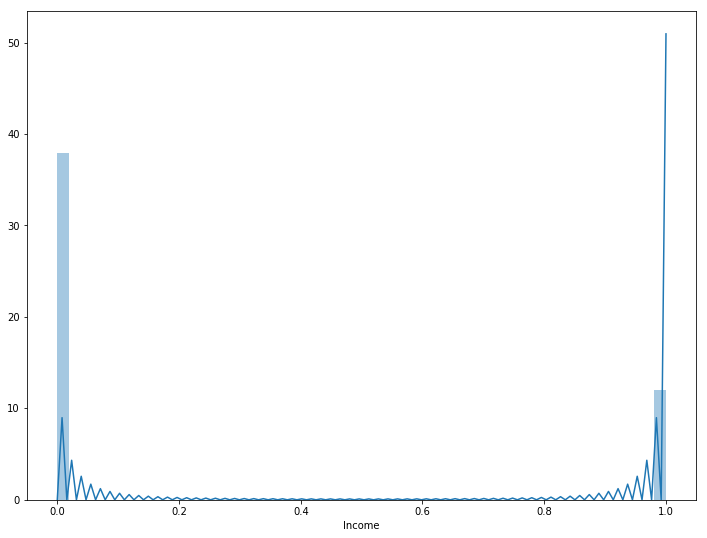

count    32561.000000
mean         0.240810
std          0.427581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Income, dtype: float64


In [286]:
(train_df, numerical_features_train) = make_plots(train_df)

In [287]:
numerical_features_train

['Age',
 'fnlgwt',
 'Education num',
 'Capital Gain',
 'Capital Loss',
 'Hours/Week',
 'Income']

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64


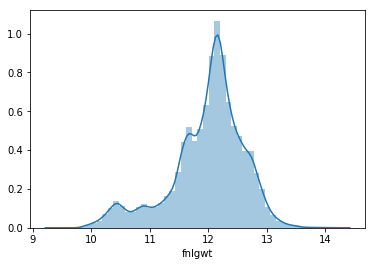

In [288]:
def handle_skew(df):
  features = df.select_dtypes(include=[np.number]).columns[1:]
  for feats in features:
    train_df[feats] = train_df[feats].apply(lambda x: np.log1p(x))
    print(train_df[feats].describe())
    sns.distplot(train_df[feats])
    plt.show()
    
    return df
  
train_df = handle_skew(train_df)    

count    32561.000000
mean         2.372506
std          0.273816
min          0.693147
25%          2.302585
50%          2.397895
75%          2.564949
max          2.833213
Name: Education num, dtype: float64


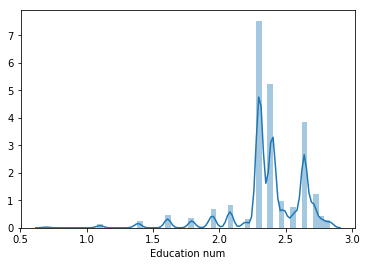

In [289]:
test_df = handle_skew(test_df)

In [0]:
joint_df = pd.concat([train_df, test_df], axis=0)

In [291]:
joint_df.dtypes

Age                object
Workclass          object
fnlgwt            float64
Education          object
Education num     float64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain      float64
Capital Loss      float64
Hours/Week        float64
Native country     object
Income              int64
dtype: object

In [0]:
cat_feats = joint_df.select_dtypes(include=['object']).columns

In [293]:
cat_feats

Index(['Age', 'Workclass', 'Education', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native country'],
      dtype='object')

In [0]:
for col in cat_feats[1:]:
  joint_df = pd.concat([joint_df, pd.get_dummies(joint_df[col], prefix=col)], axis=1)
  joint_df.drop(col, axis=1, inplace=True)

In [295]:
joint_df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Workclass_0,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital Status_ Divorced,Marital Status_ Married-AF-spouse,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Occupation_ Adm-clerical,...,Native country_ China,Native country_ Columbia,Native country_ Cuba,Native country_ Dominican-Republic,Native country_ Ecuador,Native country_ El-Salvador,Native country_ England,Native country_ France,Native country_ Germany,Native country_ Greece,Native country_ Guatemala,Native country_ Haiti,Native country_ Holand-Netherlands,Native country_ Honduras,Native country_ Hong,Native country_ Hungary,Native country_ India,Native country_ Iran,Native country_ Ireland,Native country_ Italy,Native country_ Jamaica,Native country_ Japan,Native country_ Laos,Native country_ Mexico,Native country_ Nicaragua,Native country_ Outlying-US(Guam-USVI-etc),Native country_ Peru,Native country_ Philippines,Native country_ Poland,Native country_ Portugal,Native country_ Puerto-Rico,Native country_ Scotland,Native country_ South,Native country_ Taiwan,Native country_ Thailand,Native country_ Trinadad&Tobago,Native country_ United-States,Native country_ Vietnam,Native country_ Yugoslavia,Native country_0
0,39,11.258253,2.639057,2174.0,0.0,40.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,11.330348,2.639057,0.0,0.0,13.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,12.281398,2.302585,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,12.366157,2.079442,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,12.732013,2.639057,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [296]:
train = joint_df.head(train_df.shape[0])
test = joint_df.tail(test_df.shape[0])

print(train.head())
print(test.head())
print(train.shape, test.shape)

  Age     fnlgwt  ...  Native country_ Yugoslavia  Native country_0
0  39  11.258253  ...                           0                 0
1  50  11.330348  ...                           0                 0
2  38  12.281398  ...                           0                 0
3  53  12.366157  ...                           0                 0
4  28  12.732013  ...                           0                 0

[5 rows x 109 columns]
                    Age    fnlgwt  ...  Native country_ Yugoslavia  Native country_0
0  |1x3 Cross validator       NaN  ...                           0                 1
1                    25  226802.0  ...                           0                 0
2                    38   89814.0  ...                           0                 0
3                    28  336951.0  ...                           0                 0
4                    44  160323.0  ...                           0                 0

[5 rows x 109 columns]
(32561, 109) (16282, 109)


In [297]:
test.dropna(axis=0, inplace=True)
test.head()
print(test.shape, train.shape)

(16281, 109) (32561, 109)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
train_x = train.drop('Income', axis=1)
train_y = train['Income']

In [0]:
test_x = test.drop('Income', axis=1)
test_y = test['Income']

In [300]:
train_x.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Workclass_0,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital Status_ Divorced,Marital Status_ Married-AF-spouse,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,...,Native country_ China,Native country_ Columbia,Native country_ Cuba,Native country_ Dominican-Republic,Native country_ Ecuador,Native country_ El-Salvador,Native country_ England,Native country_ France,Native country_ Germany,Native country_ Greece,Native country_ Guatemala,Native country_ Haiti,Native country_ Holand-Netherlands,Native country_ Honduras,Native country_ Hong,Native country_ Hungary,Native country_ India,Native country_ Iran,Native country_ Ireland,Native country_ Italy,Native country_ Jamaica,Native country_ Japan,Native country_ Laos,Native country_ Mexico,Native country_ Nicaragua,Native country_ Outlying-US(Guam-USVI-etc),Native country_ Peru,Native country_ Philippines,Native country_ Poland,Native country_ Portugal,Native country_ Puerto-Rico,Native country_ Scotland,Native country_ South,Native country_ Taiwan,Native country_ Thailand,Native country_ Trinadad&Tobago,Native country_ United-States,Native country_ Vietnam,Native country_ Yugoslavia,Native country_0
0,39,11.258253,2.639057,2174.0,0.0,40.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,11.330348,2.639057,0.0,0.0,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,12.281398,2.302585,0.0,0.0,40.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,12.366157,2.079442,0.0,0.0,40.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,12.732013,2.639057,0.0,0.0,40.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [301]:
train_y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [318]:
lg_reg = LogisticRegression(class_weight='balanced')

lg_reg.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_hat_train = lg_reg.predict(train_x)
y_hat_test = lg_reg.predict(test_x)

In [320]:
print(classification_report(train_y, y_hat_train))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     24720
           1       0.58      0.85      0.69      7841

    accuracy                           0.81     32561
   macro avg       0.76      0.83      0.78     32561
weighted avg       0.86      0.81      0.82     32561



In [321]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [324]:
print(classification_report(test_y, y_hat_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12435
           1       0.24      1.00      0.38      3846

    accuracy                           0.24     16281
   macro avg       0.12      0.50      0.19     16281
weighted avg       0.06      0.24      0.09     16281



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [323]:
print(accuracy_score(train_y, y_hat_train))
print(accuracy_score(test_y, y_hat_test))

0.8127514511225086
0.23622627602727106


In [267]:
print(confusion_matrix(train_y, y_hat_train))
print(confusion_matrix(test_y, y_hat_test))

[[23038  1682]
 [ 3097  4744]]
[[    0 12435]
 [    0  3846]]
